In [1]:
pip install mlbgame

Note: you may need to restart the kernel to use updated packages.


In [18]:
import mlbgame #import MLB API used for passing scores for prediction
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #used for splitting data into training and testing 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import pickle
import urllib
import requests
from bs4 import BeautifulSoup
import os

In [3]:
# Setting tokens for team batting stats on ESPN database
teamBatting = {
    "New York Mets": 0,
    "Atlanta Braves": 1,
    "Boston Red Sox": 2,
    "Washington Nationals": 3,
    "San Francisco Giants": 4,
    "Chicago White Sox": 5,
    "Baltimore Orioles": 6,
    "Colorado Rockies": 7, 
    "Philadelphia Phillies": 8,
    "San Diego Padres": 9,
    "Los Angeles Dodgers": 10,
    "Toronto Blue Jays": 11,
    "Los Angeles Angels": 12,
    "New York Yankees": 13,
    "Detroit Tigers": 14,
    "Kansas City Royals": 15,
    "Miami Marlins": 16,
    "Minnesota Twins": 17,
    "Arizona Diamondbacks": 18,
    "Houston Astros": 19,
    "Tampa Bay Rays": 20,
    "St. Louis Cardinals": 21,
    "Cleveland Indians": 22, 
    "Seattle Mariners": 23,
    "Oakland Athletics": 24,
    "Milwaukee Brewers": 25,
    "Chicago Cubs": 26,
    "Pittsburgh Pirates": 27,
    "Texas Rangers": 28,
    "Cincinnati Reds": 29,
}
# Setting tokens for team pitching stats on ESPN database
teamPitching = {
    "Los Angeles Dodgers": 0,
    "Cleveland Indians": 1,
    "Tampa Bay Rays": 2,
    "Minnesota Twins": 3,
    "Oakland Athletics": 4,
    "Chicago White Sox": 5,
    "Cincinnati Reds": 6,
    "San Diego Padres": 7,
    "St. Louis Cardinals": 8,
    "Chicago Cubs": 9,
    "Milwaukee Brewers": 10,
    "Kansas City Royals": 11,
    "Houston Astros": 12,
    "New York Yankees": 13,
    "Atlanta Braves": 14,
    "Baltimore Orioles": 15,
    "Toronto Blue Jays": 16,
    "San Francisco Giants": 17, 
    "Pittsburgh Pirates": 18, 
    "Arizona Diamondbacks": 19,
    "Miami Marlins": 20,
    "New York Mets": 21, 
    "Seattle Mariners": 22,
    "Texas Rangers": 23,
    "Los Angeles Angels": 24,
    "Washington Nationals": 25,
    "Philadelphia Phillies": 26,
    "Boston Red Sox": 27,
    "Colorado Rockies": 28,
    "Detroit Tigers": 29,
}

In [4]:
# load dataset
data = pd.read_csv("baseballData.csv")
print(data)

                  away_team             home_team  Delta (ERA)  Delta (RBI)  \
0             New York Mets    Kansas City Royals         0.64           -9   
1     Philadelphia Phillies       Cincinnati Reds         0.28          104   
2           Minnesota Twins     Baltimore Orioles        -0.86           20   
3      Washington Nationals        Atlanta Braves         1.00         -120   
4          Colorado Rockies  Arizona Diamondbacks         0.18          -96   
...                     ...                   ...          ...          ...   
2458      Toronto Blue Jays        Tampa Bay Rays         0.42          -81   
2459    St. Louis Cardinals    Pittsburgh Pirates         0.13          -49   
2460   San Francisco Giants     Milwaukee Brewers         0.43          -34   
2461         Detroit Tigers         Miami Marlins        -0.19          -93   
2462         Boston Red Sox     Cleveland Indians        -0.16         -103   

      Delta (SLG)  Delta (AVG)  home_team_win  
0  

In [5]:
#split dataset into independent and dependent variables
independent_cols = ['Delta (ERA)', 'Delta (RBI)', 'Delta (SLG)', 'Delta (AVG)']
X = data[independent_cols] # independent variables
y = data.home_team_win # Dependent variable

In [31]:
# split X and y into training and testing sets

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [32]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data from the training set 
finalPrediction = logreg.fit(X_train,y_train)

In [33]:
saved_model = {
    'regression': logreg
}
pickle.dump(saved_model, open( 'models' + ".p", "wb" ))

Text(0.5, 257.44, 'Predicted label')

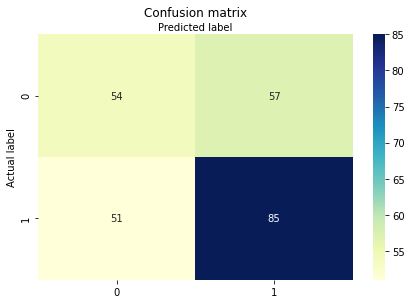

In [9]:
# prediction done by using the X_test data set 
y_pred=logreg.predict(X_test)

# confusion matrix used to test the accuracy precision of the prediction 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

# set up the matplot
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap for data set 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [10]:
print("Accuracy:","{:.3%}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precision:","{:.3%}".format(metrics.precision_score(y_test, y_pred)))
print("Recall:","{:.3%}".format(metrics.recall_score(y_test, y_pred)))

Accuracy: 56.275%
Precision: 59.859%
Recall: 62.500%


In [11]:
def measure_accuracy(independent_column):
    X = data[independent_column] # independent variables
    y = data.home_team_win # Dependent variable
    
    # split X and y into training and testing sets
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
    
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data from the training set 
    finalPrediction = logreg.fit(X_train,y_train)

    # prediction done by using the X_test data set 
    y_pred=logreg.predict(X_test)
    
    print(independent_column[0])
    print("Accuracy:","{:.3%}".format(metrics.accuracy_score(y_test, y_pred)))
    print("Precision:","{:.3%}".format(metrics.precision_score(y_test, y_pred)))
    print("Recall:","{:.3%}".format(metrics.recall_score(y_test, y_pred)))
    print()

In [12]:
measure_accuracy(['Delta (ERA)'])
measure_accuracy(['Delta (RBI)'])
measure_accuracy(['Delta (SLG)'])
measure_accuracy(['Delta (AVG)'])

Delta (ERA)
Accuracy: 55.781%
Precision: 56.119%
Recall: 72.587%

Delta (RBI)
Accuracy: 52.941%
Precision: 55.522%
Recall: 69.145%

Delta (SLG)
Accuracy: 54.767%
Precision: 55.031%
Recall: 98.529%

Delta (AVG)
Accuracy: 54.564%
Precision: 54.564%
Recall: 100.000%



In [13]:
# sets up functions to acquire team pitching stats 
url_pitching = "https://www.espn.com/mlb/stats/team/_/view/pitching"
page = requests.get(url_pitching)
soup = BeautifulSoup(page.text, 'html.parser')
tablePRows = soup.find_all('tr', attrs = {'class': "Table__TR Table__TR--sm Table__even"})
def findPStats(index): 
    count = 0
    teams = []
    stats = []
    output = []
    for row in tablePRows: 
        if count == (index + 30): 
            teams.append(row)
            for team in teams: 
                stats.append(team.find_all('td'))
                for stat in stats:
                    output.append(float(stat[3].text))
                    return output
        count = count + 1
    count = 0
def gatherPitchingStats(homeTeam, awayTeam): 
    homeIndex = teamPitching.get(homeTeam)
    awayIndex = teamPitching.get(awayTeam)
    finalStats = []
    finalStats.append(findPStats(homeIndex)[0] - findPStats(awayIndex)[0])
    return (finalStats)

# sets up functions to acquire team batting stats 
url_batting = "https://www.espn.com/mlb/stats/team"
page = requests.get(url_batting)
soup = BeautifulSoup(page.text, 'html.parser')
tableBRows = soup.find_all('tr', attrs = {'class': "Table__TR Table__TR--sm Table__even"})
def findBStats(index): 
    count = 0
    teams = []
    stats = []
    batting = []
    for row in tableBRows: 
        if count == (index + 30): 
            teams.append(row)
            for team in teams: 
                stats.append(team.find_all('td'))
                for stat in stats:
                    batting.append(float(stat[7].text))
                    batting.append(float(stat[14].text))
                    batting.append(float(stat[12].text))
                    return batting
        count = count + 1
    count = 0
def gatherBattingStats(homeTeam, awayTeam): 
    homeIndex = teamBatting.get(homeTeam)
    awayIndex = teamBatting.get(awayTeam)
    finalStats = []
    finalStats.append(findBStats(homeIndex)[0] - findBStats(awayIndex)[0])
    finalStats.append(findBStats(homeIndex)[1] - findBStats(awayIndex)[1])
    finalStats.append(findBStats(homeIndex)[2] - findBStats(awayIndex)[2])
    return (finalStats)

In [14]:
# main function to gather stats of the inputted teams
def gatherStats(homeTeam, awayTeam): 
    output = []
    output.append(gatherPitchingStats(homeTeam, awayTeam)[0])
    output.append(gatherBattingStats(homeTeam, awayTeam)[0])
    output.append(gatherBattingStats(homeTeam, awayTeam)[1])
    output.append(gatherBattingStats(homeTeam, awayTeam)[2])
    return output

In [15]:
##call the API to get stats for both teams needed to predict game
def predict_game(homeTeam, awayTeam):
    inputStats = gatherStats(homeTeam, awayTeam)
    team_stats = np.array([inputStats[0], inputStats[1], inputStats[2], inputStats[3]]).reshape(1, 4)
    prediction = logreg.predict(team_stats)
    result = prediction[0]
    if (result == 1):
        return (homeTeam + " win")
    else:
        return (awayTeam + " win")

In [28]:
def predict_with_pickle(homeTeam, awayTeam):
    # Loads logistic regression model from pickle file
    with open('models.p', 'rb') as pickled:
        data = pickle.load(pickled)
        print('Entered pickled file:')
    pickled_logreg = data['regression']
    
    inputStats = gatherStats(homeTeam, awayTeam)
    team_stats = np.array([inputStats[0], inputStats[1], inputStats[2], inputStats[3]]).reshape(1, 4)
    prediction = pickled_logreg.predict(team_stats)
    result = prediction[0]
    if (result == 1):
        return (homeTeam + " win")
    else:
        return (awayTeam + " win")

In [17]:
print(predict_game("Atlanta Braves", "Houston Astros"))
print(predict_game("New York Yankees", "Boston Red Sox"))
print(predict_game("Los Angeles Dodgers", "Toronto Blue Jays"))
print(predict_game("Minnesota Twins", "Pittsburgh Pirates"))
print(predict_game("New York Mets", "San Diego Padres"))

Atlanta Braves win
New York Yankees win
Los Angeles Dodgers win
Minnesota Twins win
San Diego Padres win


In [35]:
print(predict_with_pickle("Atlanta Braves", "Houston Astros"))
print(predict_with_pickle("New York Yankees", "Boston Red Sox"))
print(predict_with_pickle("Los Angeles Dodgers", "Toronto Blue Jays"))
print(predict_with_pickle("Minnesota Twins", "Pittsburgh Pirates"))
print(predict_with_pickle("New York Mets", "San Diego Padres"))

Entered pickled file:
Atlanta Braves win
Entered pickled file:
New York Yankees win
Entered pickled file:
Los Angeles Dodgers win
Entered pickled file:
Minnesota Twins win
Entered pickled file:
San Diego Padres win
